Classifying Digits

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics  import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [9]:
from sklearn.datasets import load_digits
digits=load_digits()
X,y=digits.data,digits.target


In [12]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
pd.DataFrame(y)

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [11]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [16]:
#converts y==0 to as 1 rest as 0
y_binary=(y==0).astype(int)


In [17]:
pd.DataFrame(y_binary).value_counts()

,count
0,
0,1619
1,178


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [20]:
y_pred=model.predict(X_test)

In [21]:
model.score(X_test,y_test)

0.9611111111111111

In [22]:
model.score(X_train,y_train)

0.9937369519832986

In [24]:
accuracy_score(y_test,y_pred)

0.9611111111111111

In [25]:
confusion_matrix(y_test,y_pred)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4, 36]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.96      0.95        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.85      0.93      0.89        30
           9       0.97      0.90      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [29]:
# for multiclass one-vs-all
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
ova=LogisticRegression(solver='liblinear',multi_class='ovr')
ova.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [30]:
y_pred_ova=ova.predict(X_test)

In [32]:
ova.score(X_train,y_train)

0.9937369519832986

In [33]:
ova.score(X_test,y_test)

0.9611111111111111

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.96      0.95        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.85      0.93      0.89        30
           9       0.97      0.90      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [36]:
#for one-vs-one (uses softmax here)
ovo_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # Uses Softmax
ovo_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [37]:
y_pred_ovo = ovo_model.predict(X_test)

In [38]:
ovo_model.score(X_train,y_train)

1.0

In [39]:
ovo_model.score(X_test,y_test)

0.9694444444444444

In [41]:
print(classification_report(y_test,y_pred_ovo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [47]:
# lets see prediction
sample_index=np.random.randint(len(X_test))
print(sample_index)
sample=X_test[sample_index].reshape(1,-1)
print(sample)
true_value=y_test[sample_index]
print(true_value)

205
[[ 0.  0.  4. 10. 13.  3.  0.  0.  0.  4. 16. 13. 16.  8.  0.  0.  0.  5.
  15.  0. 14. 11.  0.  0.  0.  3. 15. 15. 16. 16.  1.  0.  0.  0.  5.  9.
   8. 14.  8.  0.  0.  0.  0.  0.  0. 12.  8.  0.  0.  0.  9. 15. 10. 14.
   7.  0.  0.  0.  4. 12. 14. 11.  2.  0.]]
9


In [52]:
pred_ova = ova.predict(sample)[0]
print(pred_ova)
pred_ovo = ovo_model.predict(sample)[0]
print(pred_ovo)


9
9


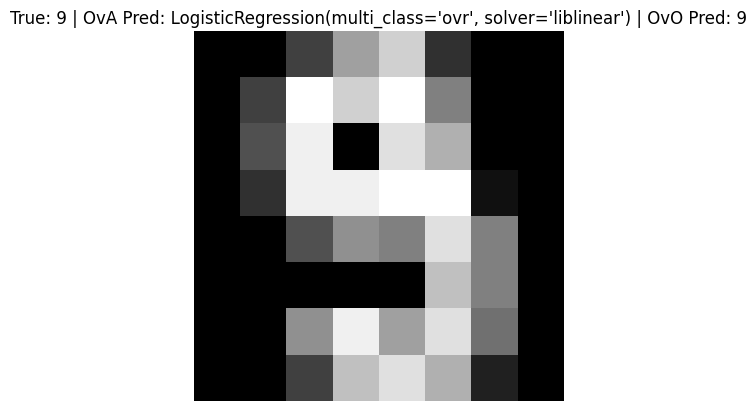

In [50]:
plt.imshow(sample.reshape(8, 8), cmap='gray')
plt.title(f"True: {true_value} | OvA Pred: {ova} | OvO Pred: {pred_ovo}") #any prediction match true value image wll display
plt.axis('off')
plt.show()